# PCA on Images

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
oliv = datasets.fetch_olivetti_faces()
oliv

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
          0.16115703,  0.1570248 ],
        [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
          

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

Plotting the images

In [9]:
oliv.images.shape

(400, 64, 64)

In [11]:
# Data = 400 lines of images [pixels(64*64) in one line]
oliv.data.shape

(400, 4096)

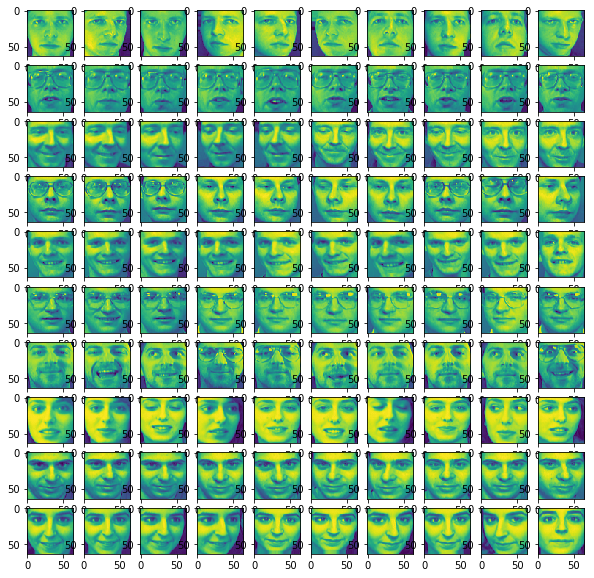

In [15]:
# plotting only 100 images
fig = plt.figure(figsize=(10,10))

for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(oliv.images[i])
    
plt.show()

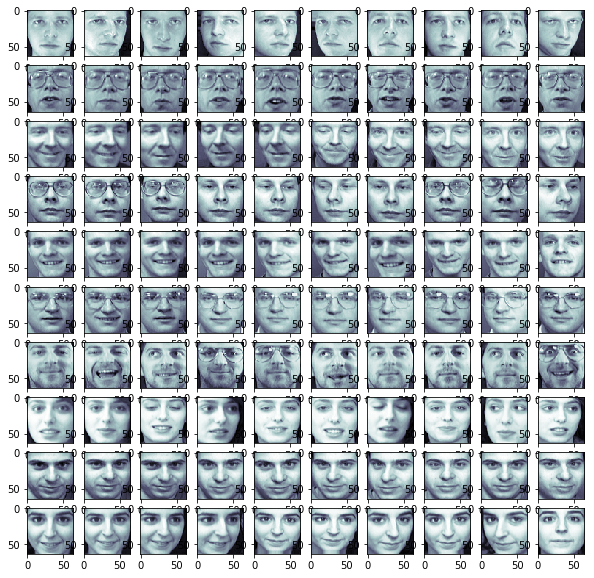

In [17]:
# plotting only 100 images
fig = plt.figure(figsize=(10,10))

for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(oliv.images[i],cmap = plt.cm.bone)
    
plt.show()

While we showed the images using key "image", PCA is applied on 2D Data therefore:

In [25]:
x = oliv.data
y = oliv.target

Note the number of components created. 
Ideally(from whatever we have studied till now) it should have been 4096 * 4096 for a data of 400*4096
But, 400 components(minimum of m,n) are created with 4096 features each.

In [26]:
pca = PCA()

pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_.shape

(400, 4096)

Finding optial K features  

In [29]:
current_variance_sum = 0
total = sum(pca.explained_variance_)
k = 0

while current_variance_sum/total < 0.95:
    current_variance_sum += pca.explained_variance_[k]
    k = k+1
    
k       

123

Features reduced from 4096 to k keeping variance as required.

In [30]:
pca1 = PCA(n_components = k)
x_transformed = pca1.fit_transform(x)
x_transformed.shape

(400, 123)

In [32]:
x_approx = pca1.inverse_transform(x_transformed)
x_approx.shape

(400, 4096)

To convert back to images, reshaping is required :

In [33]:
x_approx_images = x_approx.reshape((400,64,64))

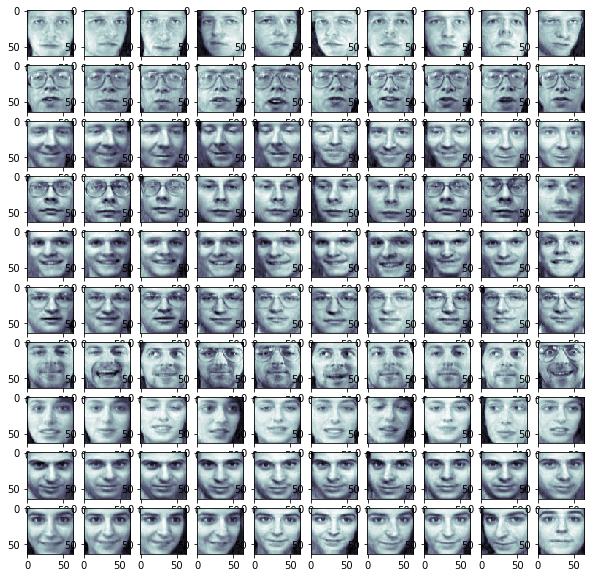

In [35]:
# plotting only 100 images
fig = plt.figure(figsize=(10,10))

for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(x_approx_images[i],cmap = plt.cm.bone)
    
plt.show()

The images are looking pretty much similar, no significant change can be seen even when we reduced features from 4096 to 123.

In [36]:
eigenv = pca1.components_
eigenv.shape

(123, 4096)

Plotting The components and seeing how each one of them carries significant information. (Some of them focus on eyes , some on specs and some on other face features)

In [38]:
eigen_faces = eigenv.reshape((123,64,64))

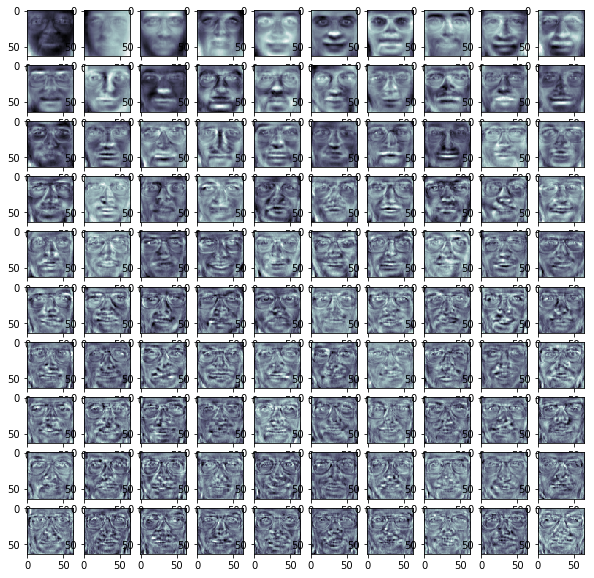

In [41]:
fig = plt.figure(figsize=(10,10))

for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
    
plt.show()